<a href="https://colab.research.google.com/github/aniruddh-shukla/ATML-proj/blob/main/Govind_ATML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

from os import listdir
from os.path import isfile, join
import string

# dataset
from sklearn.datasets import fetch_20newsgroups

### Pre-processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from collections import Counter

## Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

##Evaluation
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
news_group = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
news_group_data = news_group.data
news_group_target_names = news_group.target_names
news_group_target = news_group.target

# Creating a dataframe from the loaded data
news_df = pd.DataFrame({'desc': news_group_data, 
                        'class': news_group_target})

###EDA

In [3]:
print(news_group_target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   desc    11314 non-null  object
 1   class   11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


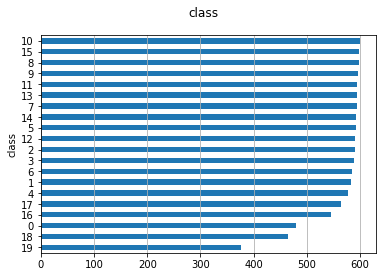

In [5]:
#Class distribution Visualization
x = "class"

fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
news_df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [6]:
news_df['desc'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [7]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
news_df['desc']=news_df['desc'].apply(lambda x:expand_contractions(x))
news_df['desc'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [8]:
## Remove '\n' from the News description
news_df['cleaned_desc']=news_df['desc'].apply(lambda x: x.replace('\n',' '))
## Converting every text to lowercase
news_df['cleaned_desc']=news_df['cleaned_desc'].apply(lambda x: x.lower())

## Removing digits and word containing digits
news_df['cleaned_desc']=news_df['cleaned_desc'].apply(lambda x: re.sub('\w*\d\w*',' ', x))

## Removing Punctuation
news_df['cleaned_desc']=news_df['cleaned_desc'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

## Removing multiple white spaces
news_df['cleaned_desc']=news_df['cleaned_desc'].apply(lambda x: re.sub(' +',' ',x))

news_df['cleaned_desc'][4]

'from article world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that do not have the right values in yet because they are not set till after launch and suchlike rather than fix the code and possibly introduce new bugs they just tell the crew ok if you see a warning no before liftoff ignore it '

In [9]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
news_df['lemmatized_desc']=news_df['cleaned_desc'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [10]:
news_df['lemmatized_desc'].iloc[4]

'article world std com tombaker world std com tom baker understanding expect error basically know bug warning system software thing check right value set till launch suchlike fix code possibly introduce new bug tell crew ok warning liftoff ignore'

In [ ]:
train_df, test_df = train_test_split(news_df, test_size=0.1, random_state=42, stratify=news_df["class"])


In [13]:
news_sampled = train_df.sample(2000)
news_sampled.reset_index(drop=True, inplace=True)

news_sampled_test = test_df.sample(400)
news_sampled_test.reset_index(drop=True, inplace=True)

train_data = news_sampled["lemmatized_desc"]
train_target = news_sampled["class"]
test_data = news_sampled_test["lemmatized_desc"]
test_target = news_sampled_test["class"]

In [11]:
train_df, test_df = train_test_split(news_df, test_size=0.1, random_state=42, stratify=news_df["class"])
train_data = train_df["lemmatized_desc"]
train_target = train_df["class"]
test_data = test_df["lemmatized_desc"]
test_target = test_df["class"]

In [14]:
mult_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
mult_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
svc = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])

In [ ]:
cv = StratifiedShuffleSplit( test_size=0.2, random_state=42)
##BenchMark

all_models = [
    ("mult_nb", mult_nb),
    ("mult_nb_tfidf", mult_nb_tfidf),
    ("bern_nb", bern_nb),
    ("bern_nb_tfidf", bern_nb_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
#    ("w2v", etree_w2v),
#    ("w2v_tfidf", etree_w2v_tfidf),
]
scores = sorted([(name, cross_val_score(model, train_data, train_target, scoring="accuracy", cv=cv).mean()) for name, model in all_models])


In [16]:
print (tabulate(scores, floatfmt=".4f", headers=("model", 'accuracy')))

model            accuracy
-------------  ----------
bern_nb            0.0975
bern_nb_tfidf      0.0975
mult_nb            0.1705
mult_nb_tfidf      0.0842
svc                0.2075
svc_tfidf          0.1155


In [17]:
from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    #'clf__n_iter': (10, 50, 80),
}
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train_data, train_target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.4min finished


done in 207.832s

Best score: 0.609
Best parameters set:
	clf__alpha: 1e-05
	clf__penalty: 'elasticnet'
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 2)


In [ ]:
type(news_group.data)

In [18]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [19]:
import spacy 
from sklearn.base import BaseEstimator, TransformerMixin
nlp = spacy.load("en_core_web_md")  # this model will give you 300D

class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        return [self.nlp(text).vector for text in X]

In [20]:
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", RandomForestClassifier()),
    ])
embeddings_pipeline.fit(train_data, train_target)
y_pred = embeddings_pipeline.predict(test_data)

In [21]:
print('Classification report:\n\n{}'.format(
    classification_report(test_target, y_pred))
)

Classification report:

              precision    recall  f1-score   support

           0       0.42      0.31      0.36        16
           1       0.47      0.50      0.48        16
           2       0.44      0.44      0.44        18
           3       0.44      0.40      0.42        20
           4       0.29      0.47      0.36        19
           5       0.59      0.45      0.51        22
           6       0.44      0.64      0.52        22
           7       0.71      0.59      0.65        17
           8       0.50      0.47      0.48        15
           9       0.67      0.61      0.64        23
          10       0.78      0.78      0.78        23
          11       0.65      0.52      0.58        21
          12       0.92      0.48      0.63        25
          13       0.68      0.68      0.68        22
          14       0.70      0.68      0.69        28
          15       0.52      0.81      0.63        21
          16       0.41      0.61      0.49        18
   

###Part of Speech(POS)


In [ ]:
class Cleaner():

    def __init__(self):
        self.stop_words = stopwords.words('english')

    def clean_news(self, text):
        text = re.sub(r'(From:\s+[^\n]+\n)', '', text) # remove From
        text = re.sub(r'(Subject:)', '', text) # remove the word "Subject:""
        text = text.lower() # Convert to lowerCase
        text = text.strip() # Strip terminal spaces
        text = re.sub(self.re_url, '', text)
        text = re.sub(self.re_email, '', text)       
        text = re.sub(r'\s+\w{1}\s+', ' ', text) #remove single char
        #text = text.replace('\n',' ')
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) # punctuations
        text = re.sub(r'^\d+\s|\s\d+\s|\s\d+$', ' ', text) # remove pure digits
        text = re.sub(r'(\s+)', ' ', text) # replace >1 whitespaces with single space

        return text

    def removeStopWords(self, text):
        
        x = text.split(' ')
        for word in x:
            if(word in self.stop_words):
                x = list(filter((word).__ne__, x))
        return ' '.join(x)

    def fit(self, x, y=None):
        return self
    def transform(self, data):
        cleaner = Cleaner()
        
        data_array = []
        for d in data:
            #s = cleaner.clean_news(d)
            w = cleaner.removeStopWords(d)
            data_array.append(w)
        return data_array 

###BOW Vectorizer

In [ ]:
class BOWVectorizer():
    def __init__(self):
        self.vectorize = None
    def fit(self, x, y=None):
        bowvec = TfidfVectorizer()
        bowvec.fit(x)
        self.vectorize = bowvec
        return self.vectorize
    
    def transform(self, data):
        x = self.vectorize.transform(data)
        return x

In [ ]:
class POSVectorizer():
    def __init__(self):
        pass

    def creatingPOSTags(self, x):
             
        pos_family = {'NOUN' : ['NN','NNS','NNP','NNPS'],
                    'PRON' : ['PRP','PRP$','WP','WP$'], 
                    'VERB' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
                    'ADJ'  : ['JJ','JJR','JJS'],
                    'ADV'  : ['RB','RBR','RBS','WRB']
                    }
            
        count_pos = {'NOUN':0,'PRON':0,'VERB':0,'ADJ':0,'ADV':0}
        
        blob  = TextBlob(x) #converts sentences to tokens
        for tuple in blob.tags: #blob tags contains term and its pos
            #print(tuple)
            pos = list(tuple)[1]
            if pos in pos_family['NOUN']:
                count_pos['NOUN'] = count_pos.get('NOUN')+1
            elif pos in pos_family['PRON']:
                count_pos['PRON'] = count_pos.get('PRON')+1
            elif pos in pos_family['VERB']:
                count_pos['VERB'] = count_pos.get('VERB')+1
            elif pos in pos_family['ADJ']:
                count_pos['ADJ'] = count_pos.get('ADJ')+1
            elif pos in pos_family['ADV']:
                count_pos['ADV'] = count_pos.get('ADV')+1
        return count_pos 
    
    def fit(self, x, y=None):
        return self
    def transform(self, data):
        posVector = POSVectorizer()
        pos_vect = []
        for d in data:
            pos_vect.append(posVector.creatingPOSTags(d))
        return pos_vect

###Convert to Array

In [ ]:
class ToArray():

    def transform(self, X):
        return X.toarray()

    def fit(self, X, y=None, **fit_params):        
        return self

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
bow_transformer = Pipeline(
    steps=[
        ("cleaner", Cleaner()),
        ("bow", BOWVectorizer()),
        ("toarray", ToArray()), #converting toarray since minmax can't handle sparce matrix
        ("scale", preprocessing.MinMaxScaler())
    ]
)


pos_transformer = Pipeline(
    steps=[
        ("cleaner", Cleaner()),
        ("pos", POSVectorizer()),
        ("dict_vect", DictVectorizer()),
        ("toarray", ToArray()), #converting toarray since minmax can't handle sparce matrix
        ("scale", preprocessing.MinMaxScaler())
    ]
)

combined_features = FeatureUnion(
    transformer_list=[
        ("bow", bow_transformer),
        ("pos", pos_transformer),
    ]
)

def fitFinalPipeline(classifier, X_train, Y_train, X_test, Y_test):
    final_pipeline = Pipeline(
        steps=[
            ("combined_features", combined_features),
            ('chi',  SelectKBest(chi2, k=100)),
            ("classifier", classifier),
        ]
    )

    final_pipeline.fit(train_data, train_target)
    y_pred = final_pipeline.predict(test_data)
    cr = classification_report(test_target, y_pred)
    print(cr)

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U textstat
!pip install textblob


In [ ]:
fitFinalPipeline (RandomForestClassifier(), train_data, train_target, test_data, test_target)

In [ ]:
import textstat
import string
import nltk
from textblob import TextBlob